# Realizar Web Scraping com Python


## Objetivo:
Introduzindo o conceito de web scraping usando Python.
- Extrair dados de páginas web de forma eficiente e ética.


### O que é web scraping
Cenários possíveis de ser utilizado: na coleta de dados para análise de mercado, monitoramento de preços, ou agregação de conteúdo.

### Importante de considerar a legalidade e a ética do web scraping.
Arquivo robots.txt das páginas e o impacto de suas ações no servidor alvo.

#### Fazendo Requisições Web em Python
- Biblioteca requests para fazer solicitações HTTP em Python.
- Usar requests.get() para recuperar o conteúdo de uma página web.

In [85]:
import requests

# url = 'https://webscraper.io/test-sites/e-commerce/allinone'
url = 'https://infnet.edu.br'
resposta = requests.get(url)
print(resposta.text)



				<div style='height: 98vh;'>
					<div style='text-align: center; padding: 10% 0; font-family: Arial, Helvetica, sans-serif;'>
						<div><p>MalCare WordPress Security Plugin - Malware Scanner, Cleaner, Security Firewall Firewall</p></div>
						<p>Blocked because of Malicious Activities</p>
						<p>Reference ID: 13465891926643ce915e565</p>
					</div>
				</div>
			


### Propriedades do Response



- `Propriedade/Método`	Descrição
- `apparent_encoding`	Retorna a codificação aparente
- `close()`	Fecha a conexão com o servidor
- `content`	Retorna o conteúdo da resposta, em bytes
- `cookies`	Retorna um objeto CookieJar com os cookies enviados de volta do servidor
- `elapsed`	Retorna um objeto timedelta com o tempo decorrido desde o envio da solicitação até a chegada da resposta
- `encoding`	Retorna a codificação usada para decodificar r.text
- `headers`	Retorna um dicionário de cabeçalhos de resposta
- `history`	Retorna uma lista de objetos de resposta contendo o histórico da solicitação (url)
- `is_permanent_redirect`	Retorna True se a resposta for o URL redirecionado permanente, caso contrário, False
- `is_redirect`	Retorna True se a resposta foi redirecionada, caso contrário, False
- `iter_content()`	Itera sobre a resposta
- `iter_lines()`	Itera sobre as linhas da resposta
- `json()`	Retorna um objeto JSON do resultado (se o resultado foi escrito no formato JSON, caso contrário gera um erro)
- `links`	Retorna os links do cabeçalho
- `next`	Retorna um objeto PreparedRequest para a próxima solicitação em um redirecionamento
- `ok`	Retorna True se status_code for menor que 400, caso contrário, False
- `raise_for_status()`	Se ocorrer um erro, este método retorna um objeto HTTPError
- `reason`	Retorna um texto correspondente ao código de status
- `request`	Retorna o objeto request que solicitou esta resposta
- `status_code`	Retorna um número que indica o status (200 é OK, 404 é Não Encontrado)
- `text`	Retorna o conteúdo da resposta, em unicode
- `url`	Retorna a URL da resposta

### Parsing de HTML com BeautifulSoup
Biblioteca BeautifulSoup é uma ferramenta para analisar / decompor / parsear o HTML obtido e extrair informações de interesse.

In [84]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(resposta.content, 'html.parser')
titulos = soup.find_all('a')
for titulo in titulos:
    print(titulo.text)
# print(soup.prettify())    
# temperatura = soup.find("span", class_="_block _margin-b-5 -gray")




#### Extrair Dados Específicos
Utilizar os métodos de BeautifulSoup para extrair informações específicas de elementos HTML, como atributos e textos.

In [29]:

# Fazendo download de uma pagina web com requests
import requests
from bs4 import BeautifulSoup

url = 'https://infnet.edu.br'
resposta = requests.get(url)

# Utilizando BeautifulSoup para parsear o HTML
soup = BeautifulSoup(resposta.text, 'html.parser')

# Extraindo o titulo da pagina
titulo = soup.title.text
print('Titulo da pagina:', titulo)


Titulo da pagina: 
			Instituto Infnet		


In [ ]:

# Exemplo de extracao de links de uma pagina
links = soup.find_all('a')
for link in links:
    print(link.get('href'))


### Usando o BeautifulSoup para analisar HTML

#### Principais Métodos do BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup

html_doc = """
<html>
  <head><title>Exemplo de Página</title></head>
  <body>
    <p class="title"><b>Exemplo de Página</b></p>
    <p class="story">Era uma vez uma história interessante.</p>
    <p class="story">Outra história interessante.</p>
    <a href="http://example.com/page1" class="link" id="link1">Link 1</a>
    <a href="http://example.com/page2" class="link" id="link2">Link 2</a>
  </body>
</html>
"""

soup = BeautifulSoup(html_doc, 'lxml')


### Métodos Principais
##### Navegação na Árvore
- soup.title: Retorna o primeiro elemento <title>.


In [ ]:

print(soup.title)  # <title>Exemplo de Página</title>


- soup.title.name: Retorna o nome da tag.


In [ ]:

print(soup.title.name)  # title


- soup.title.string: Retorna o texto contido na tag.


In [ ]:

print(soup.title.string)  # Exemplo de Página


- soup.title.parent.name: Retorna o nome da tag pai do título.


In [ ]:

print(soup.title.parent.name)  # head


- soup.p: Retorna o primeiro parágrafo.


In [ ]:

print(soup.p)  # <p class="title"><b>Exemplo de Página</b></p>


soup.p['class']: Retorna os atributos da tag.


In [ ]:

print(soup.p['class'])  # ['title']


soup.a: Retorna o primeiro link.


In [ ]:

print(soup.a)  # <a href="http://example.com/page1" class="link" id="link1">Link 1</a>

- soup.find_all('a'): Retorna todos os links.


In [ ]:
print(soup.find_all('a'))
# [<a href="http://example.com/page1" class="link" id="link1">Link 1</a>, <a href="http://example.com/page2" class="link" id="link2">Link 2</a>]


- soup.find(id='link2'): Retorna o elemento com o ID especificado.


In [ ]:

print(soup.find(id='link2'))  # <a href="http://example.com/page2" class="link" id="link2">Link 2</a>


#### Modificação da Árvore
soup.p['class'] = 'newClass': Modifica o valor de um atributo.


In [ ]:

soup.p['class'] = 'newClass'
print(soup.p)  # <p class="newClass"><b>Exemplo de Página</b></p>


- soup.a.decompose(): Remove o elemento da árvore.


In [ ]:
soup.a.decompose()
print(soup)  # O primeiro link é removido do HTML

#### Métodos de Busca
- soup.find_all('p'): Encontra todas as tags <p>.


In [ ]:

print(soup.find_all('p'))
# [<p class="newClass"><b>Exemplo de Página</b></p>, <p class="story">Era uma vez uma história interessante.</p>, <p class="story">Outra história interessante.</p>]


- soup.find('p', class_='story'): Encontra a primeira tag <p> com a classe story.


In [ ]:

print(soup.find('p', class_='story'))
# <p class="story">Era uma vez uma história interessante.</p>


- soup.select('a[href]'): Seleciona tags usando seletores CSS.


In [ ]:

print(soup.select('a[href]'))
# [<a href="http://example.com/page1" class="link" id="link1">Link 1</a>, <a href="http://example.com/page2" class="link" id="link2">Link 2</a>]


- soup.select_one('p.story'): Seleciona o primeiro elemento que corresponde ao seletor CSS.


In [ ]:

print(soup.select_one('p.story'))
# <p class="story">Era uma vez uma história interessante.</p>


## Desafio:
Escolha um site de sua preferencia (que permita web scraping) e escreva um script que extraia titulos de artigos ou produtos listados na pagina. O script deve armazenar os titulos extraidos em uma lista.


Criar um script de web scraping que coleta informações de um site de notícias, extraindo títulos de artigos e os respectivos links. 
Prestar atenção especial à ética do web scraping, garantindo não sobrecarregar o servidor.

## Scrapping ético


#### Sites que geralmente permitem webscrapping (com ressalvas):

- Sites governamentais: Muitos portais de dados abertos do governo permitem a coleta de informações públicas. Exemplos:
- Dados Abertos Brasil: dados.gov.br
- Portal da Transparência: portaldatransparencia.gov.br
- Sites de notícias: Alguns sites de notícias permitem a coleta de manchetes e resumos, mas geralmente proíbem a cópia integral de artigos. Exemplos:
- G1: g1.globo.com
- Folha de S.Paulo
- Wikipedia: A Wikipédia permite a coleta de dados, desde que se siga a licença Creative Commons e se dê os devidos créditos.
- Sites de comércio eletrônico: Alguns sites permitem a coleta de informações de produtos, como preços e descrições, para fins de comparação. Exemplos:
- Buscapé
- Zoom: zoom.com.br
- Redes sociais: Algumas redes sociais permitem a coleta de dados públicos de perfis, como nome, foto e número de seguidores. Exemplos:
- Twitter: twitter.com (com API)
- LinkedIn: linkedin.com (com API)


#
- IMDB - Banco de dados sobre filmes, séries, e personalidades do cinema.
- Reddit - Forum com discussões e postagens sobre praticamente qualquer tópico.
- Twitter - Dados em tempo real sobre eventos, opiniões públicas e tendências.
- Amazon - Informações sobre produtos, preços e avaliações de consumidores.
- Indeed - Site de busca de empregos, ótimo para coletar dados sobre oportunidades de trabalho e tendências no mercado de trabalho.
- Craigslist - Classificados online que fornecem dados sobre uma variedade de categorias, incluindo empregos, serviços e produtos usados.
- GitHub - Repositório de código-fonte e documentação de projetos de software.
- Stack Overflow - Fórum de perguntas e respostas focado em programação e desenvolvimento de software.
- Google News - Agregador de notícias de várias fontes, útil para obter dados atualizados sobre eventos atuais.

#### Importante:

- Robots.txt: Antes de realizar webscrapping, sempre verifique o arquivo robots.txt do site. Ele indica quais partes do site podem ser coletadas por robôs.
- Termos de Uso: Leia atentamente os termos de uso do site. Alguns sites proíbem explicitamente o webscrapping.
- Respeite o site: Não sobrecarregue o servidor do site com muitas requisições. Faça pausas entre as requisições e use um user agent que se identifique como um robô.
- Lei Geral de Proteção de Dados (LGPD): Ao coletar dados pessoais, esteja ciente da LGPD e utilize os dados de forma ética e responsável.


### robots.txt

Estrutura Básica
Um arquivo robots.txt geralmente contém duas partes principais: User-agent e Disallow (ou Allow). Veja um exemplo básico:


In [ ]:
User-agent: *
Disallow: /admin/
Allow: /public/

- User-agent: Especifica a qual bot as regras se aplicam. O caractere * significa todos os bots.
- Disallow: Bloqueia o acesso do bot à URL especificada. No exemplo, bloqueia o acesso à pasta /admin/.
- Allow: Permite o acesso do bot à URL especificada, mesmo que uma regra Disallow mais abrangente exista. No exemplo, permite o acesso à pasta /public/.


### Exemplos Comuns de Regras
Aqui estão alguns exemplos comuns de regras encontradas em arquivos robots.txt:



- Bloquear todo o site para todos os bots:


In [ ]:

User-agent: *
Disallow: /


- Permitir acesso completo ao site para todos os bots:


In [ ]:

User-agent: *
Disallow:

- Bloquear uma página específica:


In [ ]:

User-agent: *
Disallow: /pagina-privada.html


- Bloquear uma pasta específica:


In [ ]:

User-agent: *
Disallow: /pasta-privada/


- Permitir uma página específica em uma pasta bloqueada:


In [ ]:

User-agent: *
Disallow: /pasta-privada/
Allow: /pasta-privada/pagina-publica.html


### Comandos Avançados
Além dos comandos básicos, há outros mais avançados, como Sitemap e Crawl-delay:

Sitemap: Informa ao bot a localização do sitemap do site.


In [ ]:

Sitemap: http://www.exemplo.com/sitemap.xml


- Crawl-delay: Define um atraso em segundos entre solicitações feitas pelo bot. Nem todos os bots suportam esse comando.


In [ ]:

User-agent: *
Crawl-delay: 10


### Interpretação
Para interpretar um arquivo robots.txt, siga estas etapas:

- Identifique o User-agent: Veja a quais bots a regra se aplica.
- Leia as regras Disallow e Allow: Determine quais URLs estão bloqueadas ou permitidas.
- Procure por regras gerais e específicas: Regras específicas geralmente vêm depois das regras gerais e podem sobrescrever as anteriores.
- Considere o Sitemap e Crawl-delay se presentes: Isso pode fornecer informações adicionais sobre a indexação e a velocidade de rastreamento.


##### Exemplo Prático
Aqui está um exemplo completo e sua interpretação:


In [ ]:

User-agent: Googlebot
Disallow: /admin/
Allow: /admin/pagina-publica.html

User-agent: *
Disallow: /privado/
Sitemap: http://www.exemplo.com/sitemap.xml


- Googlebot: Não pode acessar /admin/ mas pode acessar /admin/pagina-publica.html.
- Todos os outros bots: Não podem acessar /privado/.
- Todos os bots: Podem encontrar o sitemap em http://www.exemplo.com/sitemap.xml.
  
Essas regras ajudam a gerenciar como e o que os bots podem indexar em seu site, garantindo que áreas sensíveis ou desnecessárias não sejam rastreadas e que o foco esteja no conteúdo relevante.

# Técnicas Avancadas de Web Scraping


## Usando Regex para lidar com scraping
Técnicas avancadas de web scraping que permitem lidar com paginas web mais complexas e extrair dados de maneira eficiente e robusta.


In [35]:

# Uso de expressoes regulares em web scraping
import re
from bs4 import BeautifulSoup
import requests

url = 'http://infnet.edu.br'
resposta = requests.get(url)
soup = BeautifulSoup(resposta.text, 'html.parser')

# Usando expressões regulares para encontrar todos os numeros de telefone no texto
cep = re.findall(r'\d{5}-\d{3}', soup.text)
print('Numeros de CEP encontrados:', cep)


Numeros de CEP encontrados: ['20010-020', '20041-005']


Certifique-se de que seu padrão regex esteja correto. Teste seu padrão em sites como regex101.com para verificar se ele corresponde aos dados que você deseja extrair.


### Manipulação de Exceções Durante o Scraping
É importante prever e lidar com possíveis exceções durante o processo de scraping, como conexões falhas, mudanças inesperadas na estrutura da página, ou limitações impostas pelo servidor.

In [ ]:
try:
    resposta = requests.get('http://exemplo.com')
    resposta.raise_for_status()  # Irá lançar uma exceção para respostas 4xx/5xx
    # Continuação do processo de scraping...
except requests.exceptions.HTTPError as errh:
    print ("Http Error:",errh)
except requests.exceptions.ConnectionError as errc:
    print ("Error Connecting:",errc)



## Desafio:
Apliquem as técnicas avançadas de web scraping em um projeto que requer a extração de dados de um site com conteúdo dinâmico, utilizando expressões regulares para refinar a extração de dados e implementando um robusto tratamento de exceções.


Utilize as tecnicas avancadas de web scraping para extrair informacoes de um site que carrega seu conteudo dinamicamente com JavaScript. Tente extrair dados que nao estao imediatamente disponiveis no HTML da pagina inicial, mas que sao carregados posteriormente atraves de acoes do usuario ou requisicoes AJAX.


# Uso de Expressoes Regulares com BeautifulSoup


## Objetivo:
Combinar o poder das expressoes regulares com a flexibilidade do BeautifulSoup para realizar web scraping de forma mais precisa e eficiente em paginas web complexas.


## RegEx: Expressões regulares

O que são expressões regulares e como elas podem ser usadas para identificar padrões específicos em textos.

#### Conceitos Básicos de Regex
Alguns dos componentes básicos de uma expressão regular:

- Caracteres literais: correspondem exatamente ao texto especificado (ex.: a, 1).

- Metacaracteres: símbolos que têm significados especiais e ajudam a criar padrões. Por exemplo:

    - . : corresponde a qualquer caractere único, exceto quebra de linha.
    - ^ : indica o início de uma linha.
    - $ : indica o fim de uma linha.
    - \* : zero ou mais ocorrências do elemento anterior.
    - \+ : uma ou mais ocorrências do elemento anterior.
    - ? : zero ou uma ocorrência do elemento anterior.
    - \ : usado para escapar metacaracteres.
  
- Classes de caracteres: permitem especificar um conjunto de caracteres dos quais qualquer um pode corresponder.

    - [abc]: corresponde a qualquer um dos caracteres a, b, ou c.
    - [^abc]: corresponde a qualquer caractere que não seja a, b, ou c.
    - [0-9]: corresponde a qualquer dígito entre 0 e 9.
  
- Grupos e intervalos:

    - (abc): define um grupo; corresponde à sequência "abc" e permite capturar essa parte da string.
    - {2}: especifica que o elemento anterior deve ocorrer exatamente duas vezes.
    - {2,4}: especifica que o elemento anterior deve ocorrer de duas a quatro vezes.

In [ ]:
import re

# Exemplo de padrão para encontrar e-mails
padrao_email = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'


In [1]:
import re

texto = "Para mais informações, envie um email para contato@exemplo.com ou sales@exemplo.com.br"
email_regex = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'

emails = re.findall(email_regex, texto)
print(emails)


['contato@exemplo.com', 'sales@exemplo.com.br']


Exemplos básicos de expressões regulares comuns.

validação de email

In [40]:
import re

email_regex = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
email = "exemplo@dominio.com"
if re.match(email_regex, email):
    print("E-mail válido!")
else:
    print("E-mail inválido!")


E-mail válido!


Verificação de Números de Telefone

Regex para verificar um número de telefone no formato internacional (+XX-XXXXXXXXX)

In [43]:
telefone_regex = r'^\+\d{2}-\d{9}$'
telefone = "+55-123456789"
if re.match(telefone_regex, telefone):
    print("Número de telefone válido!")
else:
    print("Número de telefone inválido!")


Número de telefone válido!


Validação de URLs

Regex para verificar se uma string é uma URL válida:

In [44]:
url_regex = r'^https?://[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}(?:/[a-zA-Z0-9%_./-~-]*)?$'
url = "https://www.exemplo.com/pagina"
if re.match(url_regex, url):
    print("URL válida!")
else:
    print("URL inválida!")


URL válida!


Verificação de Códigos Postais

Regex para validar códigos postais (exemplo usando o formato brasileiro, 00000-000)

In [45]:
cep_regex = r'^\d{5}-\d{3}$'
cep = "12345-678"
if re.match(cep_regex, cep):
    print("CEP válido!")
else:
    print("CEP inválido!")


CEP válido!


Validação de Senhas

Regex para verificar a força de uma senha, exigindo pelo menos 8 caracteres, incluindo números, letras maiúsculas e minúsculas, e símbolos:

In [46]:
senha_regex = r'^(?=.*[a-z])(?=.*[A-Z])(?=.*\d)(?=.*[@$!%*?&])[A-Za-z\d@$!%*?&]{8,}$'
senha = "SenhaForte@123"
if re.match(senha_regex, senha):
    print("Senha forte!")
else:
    print("Senha fraca!")


Senha forte!


Verificação de Datas

Regex para verificar se uma data está no formato DD/MM/AAAA:

In [ ]:
data_regex = r'^\d{2}/\d{2}/\d{4}$'
data = "01/01/2024"
if re.match(data_regex, data):
    print("Data válida!")
else:
    print("Data inválida!")


### Exemplo de utilização

In [47]:

from bs4 import BeautifulSoup
import requests
import re

url = 'https://www.infnet.edu.br/infnet/atendimento-ao-aluno/'
resposta = requests.get(url)
soup = BeautifulSoup(resposta.text, 'html.parser')

# Usando expressoes regulares para encontrar todos os e-mails na pagina
emails = re.findall(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', soup.text)
print('E-mails encontrados:', emails)


E-mails encontrados: ['atendimento.fies@infnet.edu.br', 'prouni.ctr@infnet.edu.br', 'atendimento.esti.negocios@infnet.edu.br', 'atendimento.pos.esti.negocios@infnet.edu.br', 'atendimento.controladoria@infnet.edu.br', 'ouvidoria@infnet.edu.br']


### Otimizando Expressões Regulares
Expressões regulares são poderosas, mas podem ser complexas e lentas se não forem bem escritas. Algumas dicas para otimizar suas regex incluem:

- Usar quantificadores não-gulosos (por exemplo, .*? em vez de .*), que param assim que encontram uma correspondência, reduzindo o tempo de processamento.
- Evitar capturas desnecessárias e preferir grupos não-capturantes (?:...) quando não precisar dos dados capturados.
- Utilizar classes de caracteres específicos quando possível, para limitar as correspondências possíveis.

In [65]:
from bs4 import BeautifulSoup
import requests
import re

url = 'https://www.infnet.edu.br/infnet/atendimento-ao-aluno/'
resposta = requests.get(url)
soup = BeautifulSoup(resposta.text, 'html.parser')

# Encontrar todos os links que contêm "contato" no href
links_contato = soup.find_all('a', href=re.compile('contato'))
for link in links_contato:
    print(link.get('href'))


## Métodos Regex

Principais Métodos do Módulo re


#### re.compile(pattern, flags=0):

Compila uma expressão regular em um objeto de expressão regular, que pode ser usado para busca, substituição ou outras operações. 

A compilação de uma regex é útil quando a mesma expressão será utilizada várias vezes, pois isso pode melhorar a eficiência do código.

Flags podem modificar o comportamento da expressão regular. 

Exemplos incluem <code>re.IGNORECASE, re.MULTILINE, re.DOTALL</code>, entre outros.


#### re.search(pattern, string, flags=0):

Procura pela primeira ocorrência do padrão dentro da string. Retorna um objeto de correspondência se a regex encontrar uma correspondência, caso contrário retorna None.


In [70]:
match = re.search('n', 'Python') # busca pela letra 'n' em 'Python'.
match


<re.Match object; span=(5, 6), match='n'>

#### re.match(pattern, string, flags=0):
Semelhante ao search, mas limita a busca ao início da string. Se o padrão não aparece no início da string, retorna None.


In [72]:
match = re.match('P', 'Python') # verifica se 'Python' começa com 'P'.
match


<re.Match object; span=(0, 1), match='P'>

#### re.findall(pattern, string, flags=0):
Encontra todas as ocorrências não sobrepostas do padrão na string e as retorna como uma lista de strings.


In [74]:
matches = re.findall('n', 'Banana') #– retorna ['n', 'n'].
matches

['n', 'n']

#### re.finditer(pattern, string, flags=0):

Semelhante ao findall, mas retorna um iterador que produz objetos de correspondência em vez de uma lista.


In [81]:
for match in re.finditer('n', 'Banana'): #itera sobre todas as correspondências de 'n'.
    print(match)


<re.Match object; span=(2, 3), match='n'>
<re.Match object; span=(4, 5), match='n'>


#### re.sub(pattern, repl, string, count=0, flags=0):
Substitui as ocorrências do padrão na string pelo repl. Se count é maior que 0, apenas as primeiras count ocorrências são substituídas.


In [82]:
re.sub('azul', 'verde', 'céu azul') # resulta em 'céu verde'.


'céu verde'

#### re.split(pattern, string, maxsplit=0, flags=0):

Divide a string pelo ocorrências do padrão. Se maxsplit for maior que 0, divide no máximo maxsplit vezes.


In [83]:
re.split(',', 'um, dois, três, quatro') # retorna ['um', 'dois', 'três', 'quatro'].

['um', ' dois', ' três', ' quatro']


## Desafio:
Escreva um script que utilize BeautifulSoup juntamente com expressoes regulares para extrair e imprimir todos os URLs de uma pagina que contenham a palavra "produto" no caminho.


# Praticas Recomendadas para Web Scraping Responsavel


## Objetivo:
Como realizar web scraping de forma etica e responsável.


## Respeitando o robots.txt
O arquivo robots.txt é um padrão que os sites usam para informar aos bots quais partes do site podem ou não ser acessadas. 
- É importante de verificar e respeitar as diretrizes do robots.txt antes de iniciar o scraping.


Como localizar e interpretar o arquivo robots.txt de um site.

### Gerenciamento de Sessões e Headers
Usar as sessões com headers personalizados pode ajudar a evitar bloqueios por parte dos servidores ao identificar o scraper como um cliente legítimo.

In [ ]:

# Respeitando o robots.txt
# e importante verificar o arquivo robots.txt de um site antes de iniciar o scraping
# para garantir que suas acoes estao em conformidade com as diretrizes do site.
# Exemplo: http://exemplo.com/robots.txt

# Gerenciamento de Sessoes e Headers
import requests

url = 'http://exemplo.com'
headers = {
    'User-Agent': 'Meu Web Scraper 1.0',
    'From': 'meuemail@exemplo.com'  # Isso e considerado uma boa pratica
}

resposta = requests.get(url, headers=headers)


In [ ]:
import requests
from bs4 import BeautifulSoup

url = "http://exemplo.com"
headers = {
    'User-Agent': 'Meu Web Scraper',
    'From': 'meuemail@exemplo.com'  # Isso é considerado uma boa prática
}

with requests.Session() as session:
    session.headers.update(headers)
    resposta = session.get(url)
    soup = BeautifulSoup(resposta.content, 'html.parser')


### Boas Práticas de Web Scraping
Fazer pausas entre as requisições para não sobrecarregar os servidores dos sites. 
Limitar a frequência de requisições pode ajudar a evitar ser bloqueado e ser um bom cidadão da web.

In [ ]:

# Fazendo pausas entre as requisicoes
import time

# Esperar 1 segundo entre as requisicoes
time.sleep(1)


### Legalidade e Ética
Além das técnicas, a ética e a legalidade do web scraping são cruciais. Analise os termos de serviço dos sites e a consideração sobre a natureza dos dados coletados, especialmente dados pessoais.

Desafio da Aula
Proposta: Encoraje os alunos a desenvolverem um script de web scraping que coleta informações de um diretório público de empresas, respeitando as regras de robots.txt, utilizando headers personalizados para as requisições e implementando pausas para simular um padrão de acesso humano.

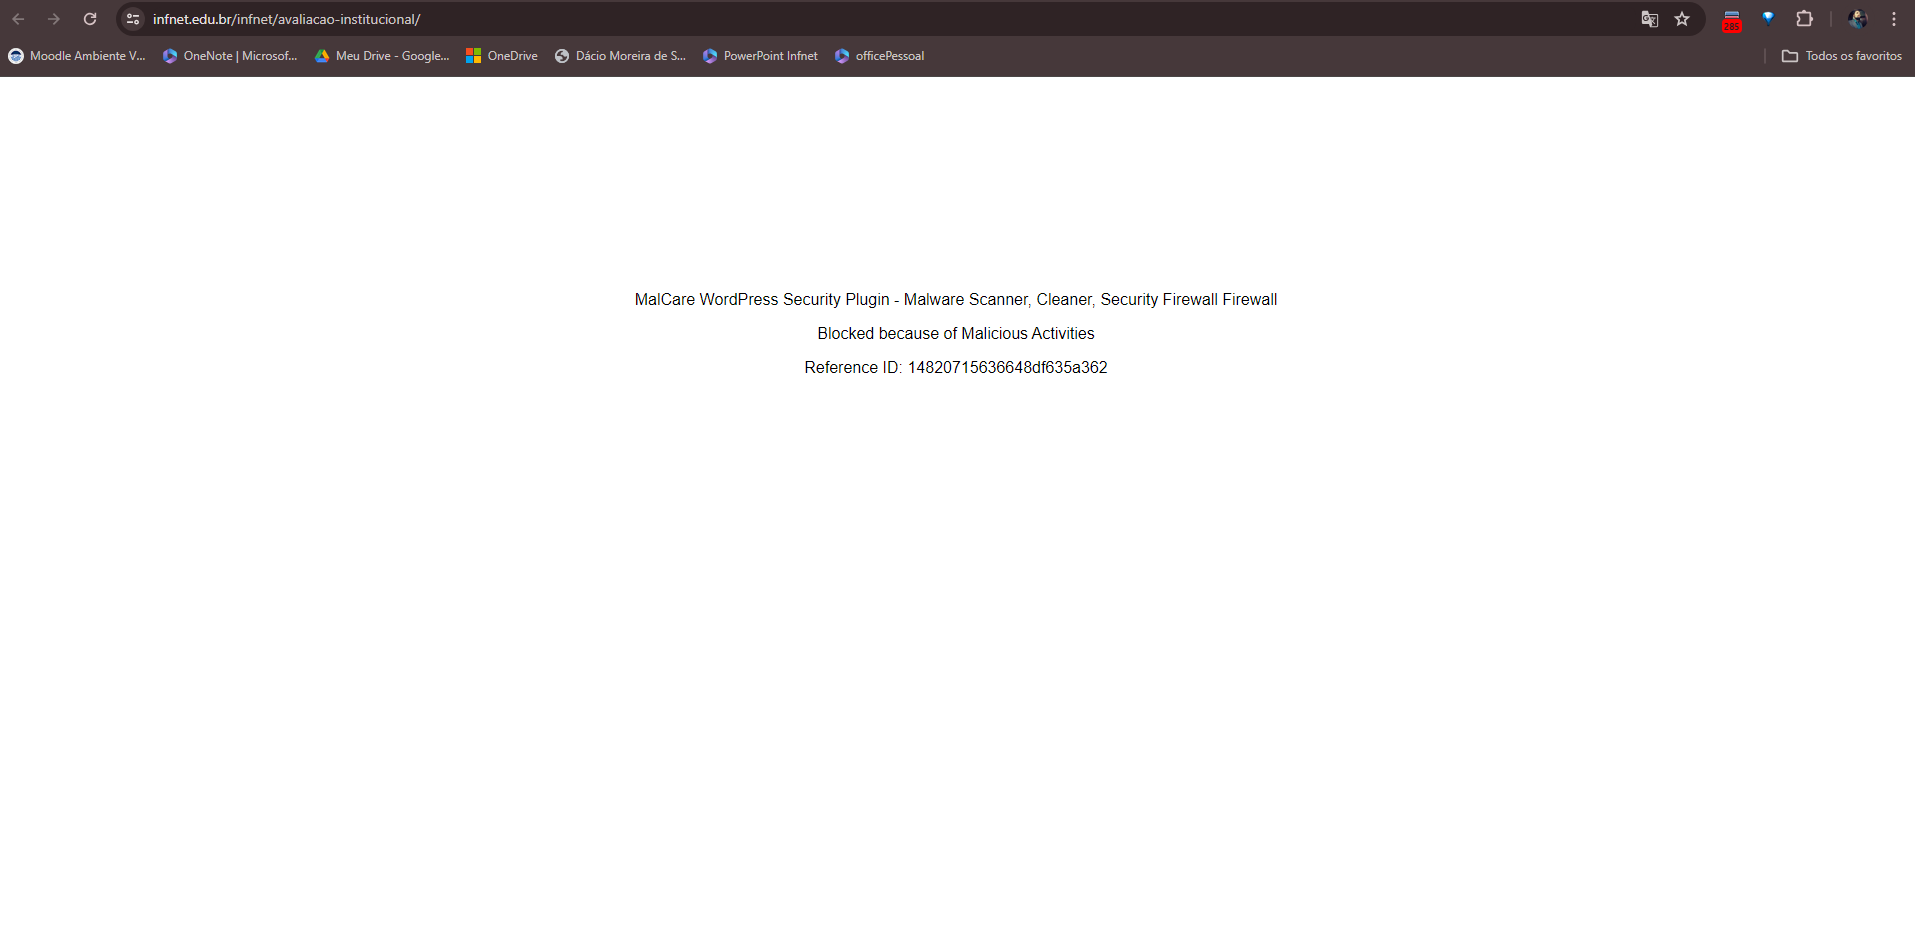


## Desafio:
Implemente um web scraper que siga as praticas recomendadas apresentadas nesta aula. Escolha um site que permita scraping (conforme indicado no seu arquivo robots.txt), colete informacoes especificas e armazene-as em um arquivo. Lembre-se de configurar o User-Agent, respeitar as regras de robots.txt e fazer pausas apropriadas entre as requisicoes.

Desenvolva um script de web scraping que coleta informações de um diretório público de empresas, respeitando as regras de robots.txt, utilizando headers personalizados para as requisições e implementando pausas para simular um padrão de acesso humano.

## Lidando com Conteúdo Dinâmico

Em sites que carregam conteúdo dinamicamente com JavaScript podemos utilizar ferramentas como __Selenium__ ou __Puppeteer__ (Ferramentas automatizadas de navegador) para interagir com esses sites.
.

Sites modernos usam JavaScript para carregar conteúdo dinamicamente. Isso pode ser um desafio para o scraping, pois o requests e o BeautifulSoup não processam JavaScript. Se for esse o caso, você pode precisar de ferramentas como Selenium ou Pyppeteer, que podem controlar um navegador web e esperar pelo carregamento do JavaScript:

In [ ]:
from selenium import webdriver

driver = webdriver.Chrome()
driver.get(url)

# Esperar explicitamente ou implicitamente pelo carregamento de elementos
content = driver.page_source


## Desafios

Escolher um site de interesse público que permita web scraping (respeitando o robots.txt) para coletar dados que possam ser analisados. Exemplos: dados sobre produtos em e-commerce, postagens em fóruns, informações meteorológicas, entre outros.

Utilizar técnicas de web scraping aprendidas para extrair os dados necessários de um site escolhido. Isso inclui o uso de requests ou selenium para acessar o site, BeautifulSoup ou lxml para parsear o HTML, e o uso opcional de expressões regulares para refinar a extração.
Tarefa: Implementar scripts de web scraping que eficientemente colete os dados desejados, armazenando-os de forma estruturada (como em um DataFrame do Pandas ou em um arquivo JSON/CSV).

Realize a limpeza e a preparação dos dados coletados, removendo duplicatas, tratando valores ausentes e convertendo tipos de dados conforme necessário.
Tarefa: Utilizar Pandas para explorar os dados, realizar análises estatísticas básicas, identificar tendências ou padrões e extrair insights valiosos.

Apresentar os resultados da análise de dados de forma clara e informativa, utilizando gráficos e visualizações quando apropriado. O Pandas, juntamente com bibliotecas como Matplotlib ou Seaborn, pode ser utilizado para criar visualizações.
Tarefa: Preparar uma apresentação ou relatório que resume as descobertas, incluindo a metodologia de coleta de dados, os desafios enfrentados, as análises realizadas e os insights obtidos.